### Author: Kevin Izadi
### Date: 12/12/2022
### Data Science Programming

#### Visulalizing the Bitcoin and Ethereum data

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import locale
import requests
import numpy as np
from requests.exceptions import ConnectionError
import datetime

df = pd.read_csv('C:/Users/izadi/Downloads/crypto_data.csv')

#### Going to convert each of the columns for closing prices to $ using the locale package

In [117]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
df['Close (BNB)'] = df['Close (BNB)'].apply(lambda x: locale.currency(x, grouping=True))
df['Close (BTC)'] = df['Close (BTC)'].apply(lambda x: locale.currency(x, grouping=True))
df['Close (ETH)'] = df['Close (ETH)'].apply(lambda x: locale.currency(x, grouping=True))
print(df)

                           Date Close (BTC)  Volume (BTC) Close (ETH)  \
0     2017-11-13 00:00:00+00:00   $6,559.49  6.263250e+09     $316.72   
1     2017-11-14 00:00:00+00:00   $6,635.75  3.197110e+09     $337.63   
2     2017-11-15 00:00:00+00:00   $7,315.54  4.200880e+09     $333.36   
3     2017-11-16 00:00:00+00:00   $7,871.69  5.123810e+09     $330.92   
4     2017-11-17 00:00:00+00:00   $7,708.99  4.651670e+09     $332.39   
...                         ...         ...           ...         ...   
1822  2022-11-09 00:00:00+00:00  $15,880.78  1.030000e+11   $1,100.17   
1823  2022-11-10 00:00:00+00:00  $17,586.77  8.320228e+10   $1,299.46   
1824  2022-11-11 00:00:00+00:00  $17,034.29  5.587162e+10   $1,287.22   
1825  2022-11-12 00:00:00+00:00  $16,799.19  2.971770e+10   $1,255.27   
1826  2022-11-13 00:00:00+00:00  $16,550.13  2.515359e+10   $1,228.58   

      Volume (ETH)  Close (USDT)  Volume (USDT) Close (BNB)  Volume (BNB)  
0       1041889984      1.009350   7.678840e+08

In [118]:
df['Volume (BTC)'] = df['Volume (BTC)'].apply(lambda x: locale.format_string('%d', x, grouping=True))
df['Volume (ETH)'] = df['Volume (ETH)'].apply(lambda x: locale.format_string('%d', x, grouping=True))
df['Volume (BNB)'] = df['Volume (BNB)'].apply(lambda x: locale.format_string('%d', x, grouping=True))
df['Volume (USDT)'] = df['Volume (USDT)'].apply(lambda x: locale.format_string('%d', x, grouping=True))
print(df)

                           Date Close (BTC)     Volume (BTC) Close (ETH)  \
0     2017-11-13 00:00:00+00:00   $6,559.49    6,263,249,920     $316.72   
1     2017-11-14 00:00:00+00:00   $6,635.75    3,197,110,016     $337.63   
2     2017-11-15 00:00:00+00:00   $7,315.54    4,200,880,128     $333.36   
3     2017-11-16 00:00:00+00:00   $7,871.69    5,123,809,792     $330.92   
4     2017-11-17 00:00:00+00:00   $7,708.99    4,651,670,016     $332.39   
...                         ...         ...              ...         ...   
1822  2022-11-09 00:00:00+00:00  $15,880.78  103,000,000,000   $1,100.17   
1823  2022-11-10 00:00:00+00:00  $17,586.77   83,202,283,721   $1,299.46   
1824  2022-11-11 00:00:00+00:00  $17,034.29   55,871,616,488   $1,287.22   
1825  2022-11-12 00:00:00+00:00  $16,799.19   29,717,699,419   $1,255.27   
1826  2022-11-13 00:00:00+00:00  $16,550.13   25,153,593,344   $1,228.58   

        Volume (ETH)  Close (USDT)    Volume (USDT) Close (BNB)   Volume (BNB)  
0     

In [119]:
df.head()

,Date,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
0,2017-11-13 00:00:00+00:00,"$6,559.49","6,263,249,920",$316.72,"1,041,889,984",1.00935,"767,884,032",$1.69,"12,238,800"
1,2017-11-14 00:00:00+00:00,"$6,635.75","3,197,110,016",$337.63,"1,069,680,000",1.00683,"429,857,984",$1.59,"7,829,600"
2,2017-11-15 00:00:00+00:00,"$7,315.54","4,200,880,128",$333.36,"722,665,984",1.00318,"449,671,008",$1.53,"7,615,500"
3,2017-11-16 00:00:00+00:00,"$7,871.69","5,123,809,792",$330.92,"797,254,016",1.00212,"650,278,976",$1.58,"8,928,640"
4,2017-11-17 00:00:00+00:00,"$7,708.99","4,651,670,016",$332.39,"621,732,992",1.00139,"639,398,016",$1.51,"8,508,840"


In [120]:
df2 = pd.read_csv('C:/Users/izadi/Downloads/Gemini_BTCUSD.csv') #New dataset for bitcoin

In [121]:
df2.head

<bound method NDFrame.head of                unix              date   symbol      open      high       low  \
0      1.670000e+12   12/14/2022 0:00  BTC/USD  17775.73  17799.99  17764.02   
1      1.670000e+12  12/13/2022 23:00  BTC/USD  17758.37  17800.00  17745.17   
2      1.670000e+12  12/13/2022 22:00  BTC/USD  17766.99  17775.75  17697.20   
3      1.670000e+12  12/13/2022 21:00  BTC/USD  17750.50  17799.10  17695.97   
4      1.670000e+12  12/13/2022 20:00  BTC/USD  17734.55  17796.96  17707.18   
...             ...               ...      ...       ...       ...       ...   
62956  1.444324e+09   10/8/2015 17:00  BTC/USD    244.25    244.99    244.02   
62957  1.444320e+09   10/8/2015 16:00  BTC/USD    244.92    244.92    244.25   
62958  1.444316e+09   10/8/2015 15:00  BTC/USD    245.00    245.00    244.92   
62959  1.444313e+09   10/8/2015 14:00  BTC/USD    245.00    245.00    244.50   
62960  1.444309e+09   10/8/2015 13:00  BTC/USD      0.00    245.00      0.00   

         

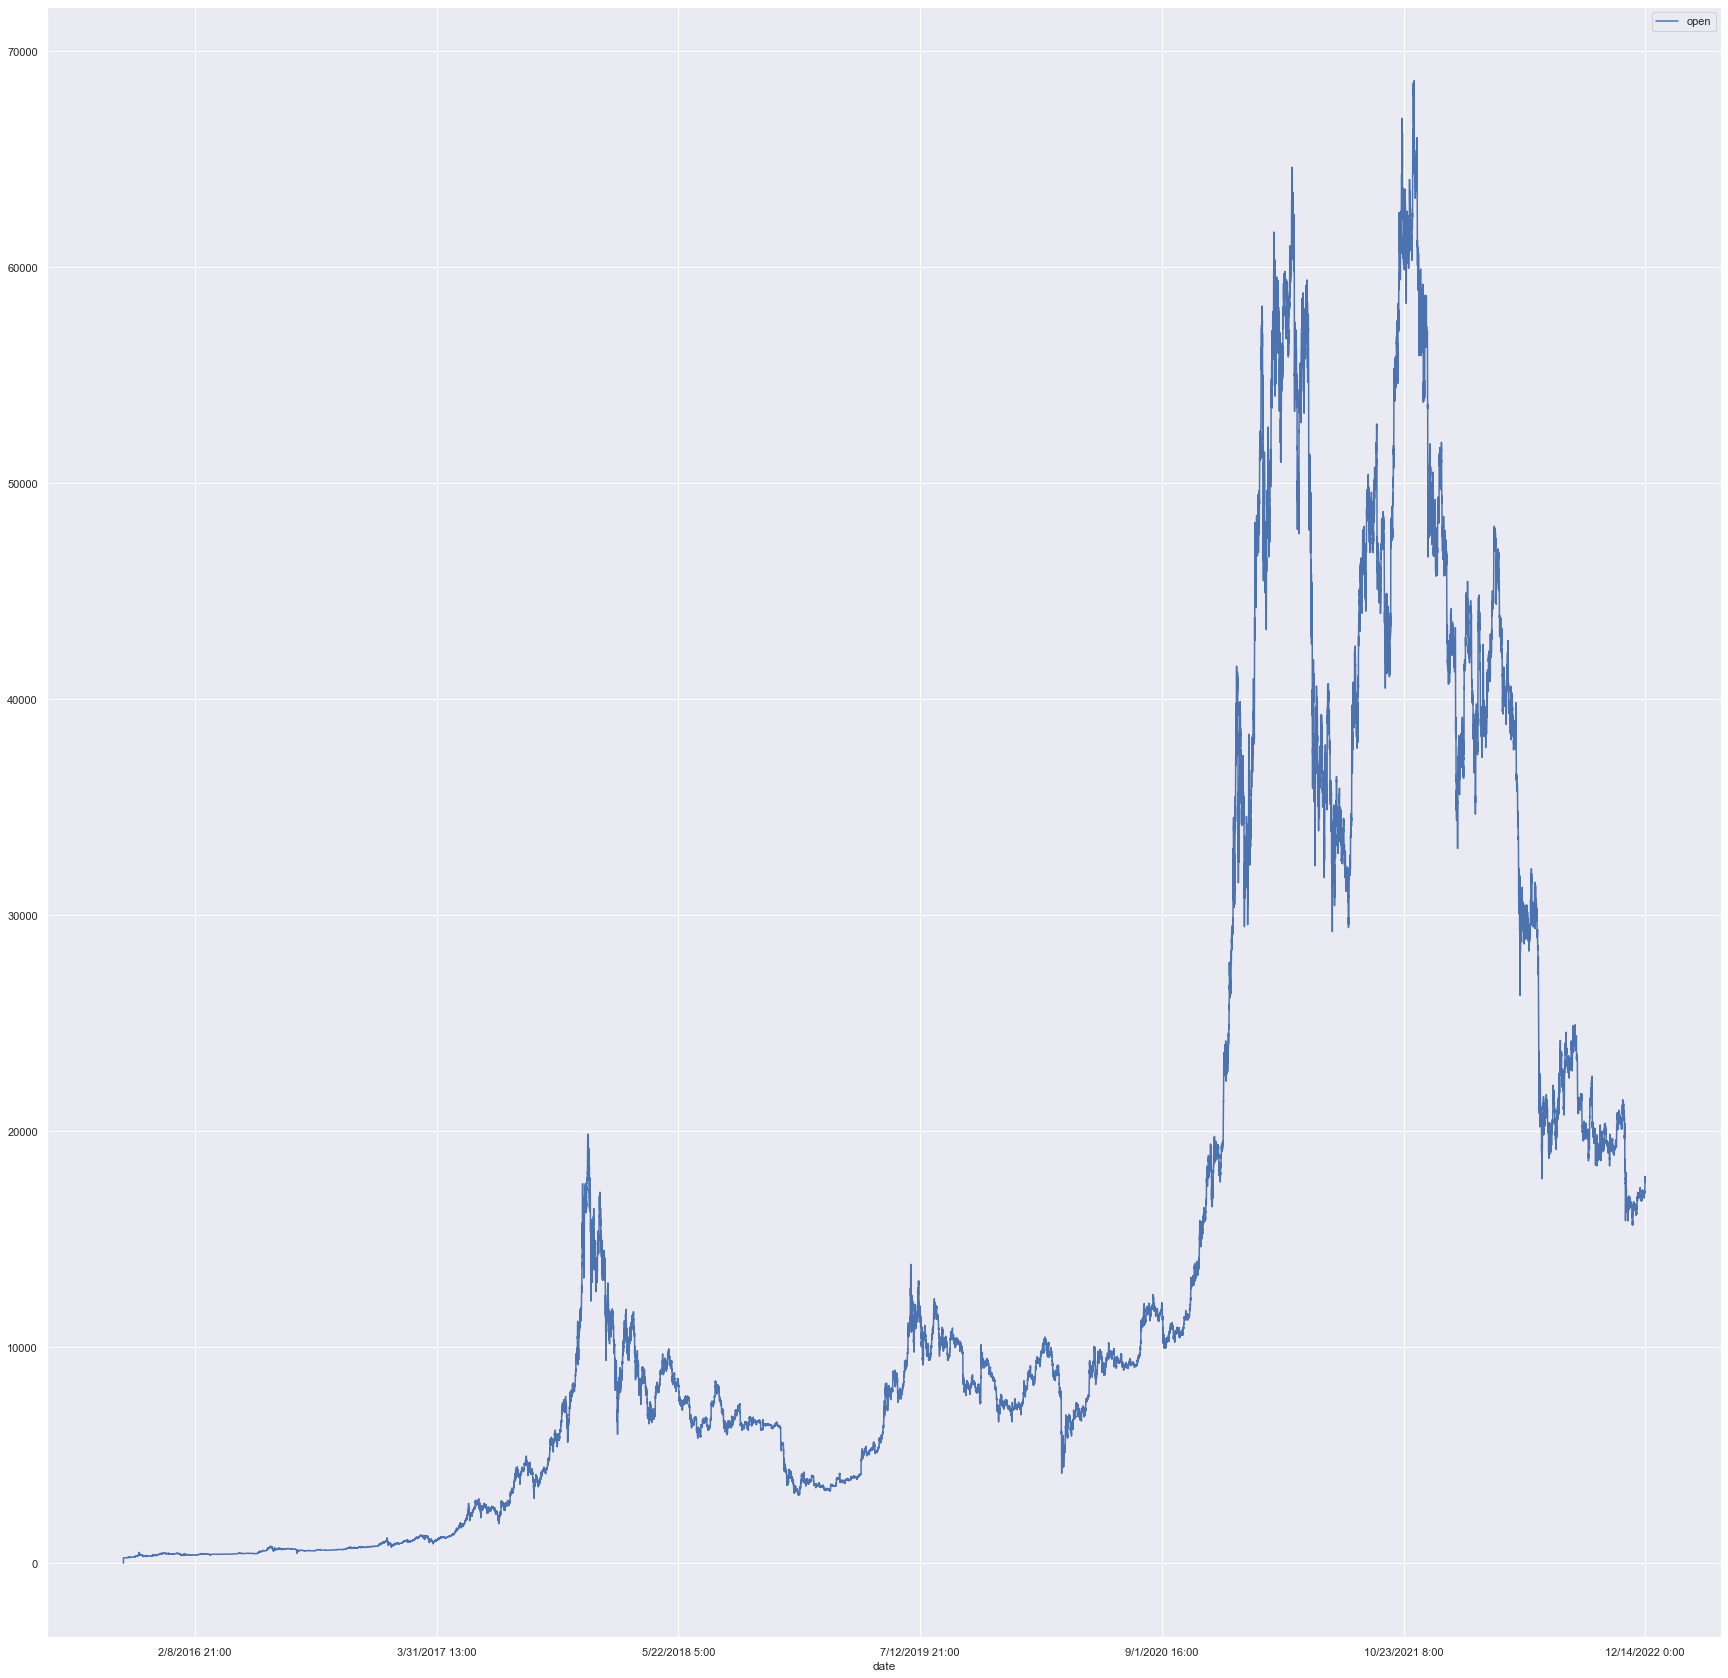

In [122]:
df2.plot(x = 'date', y = 'open')
plt.gca().invert_xaxis()

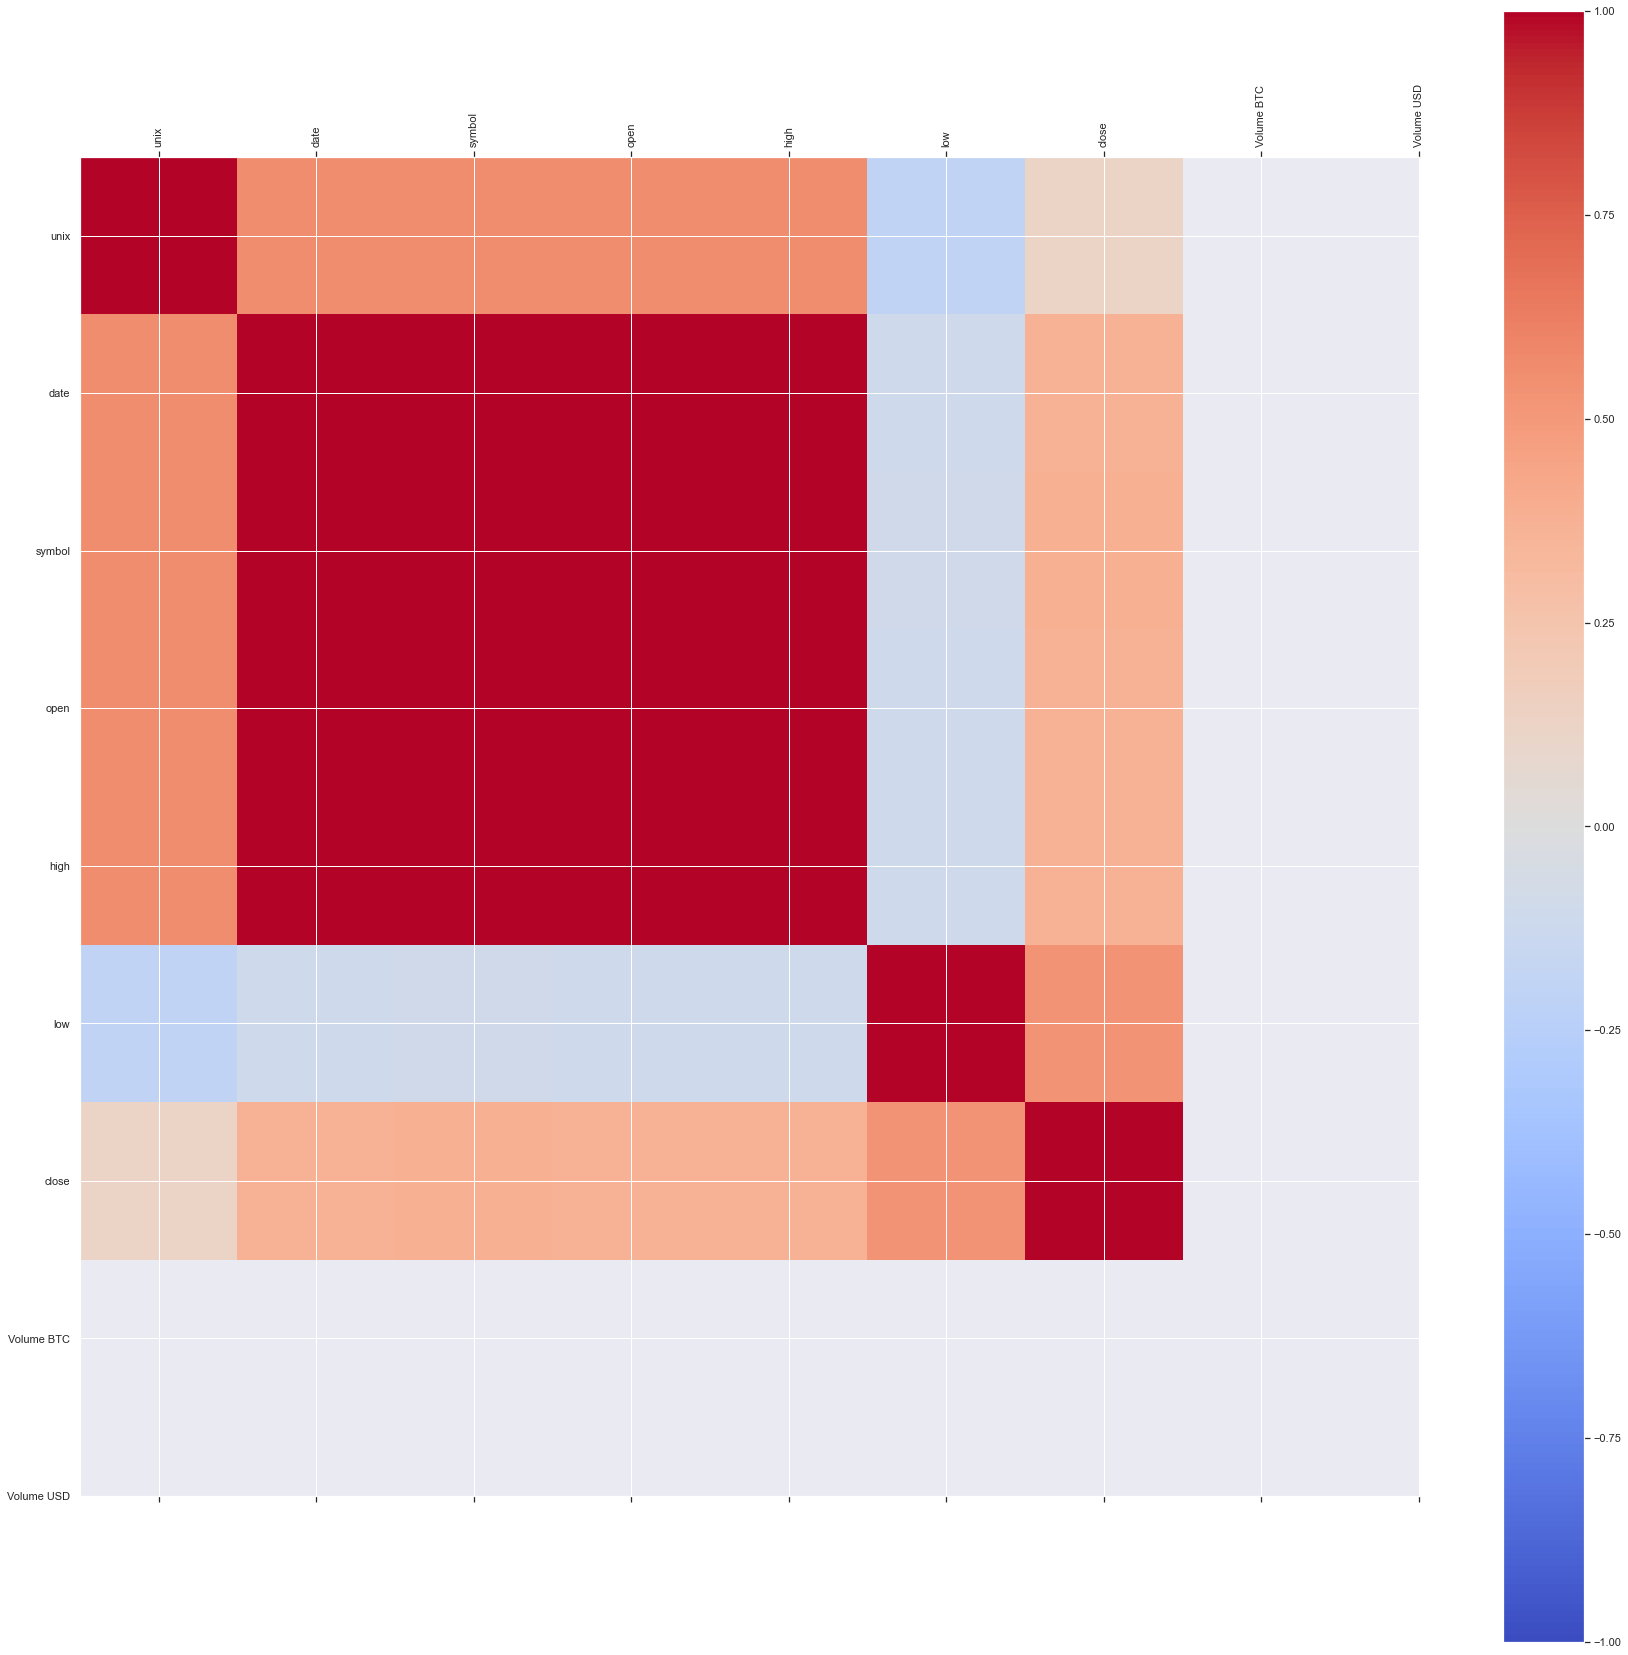

In [123]:
corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap = 'coolwarm', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()